In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import itertools
import dask
from dask.distributed import Client, progress
import seaborn as sns
import time
import os.path

In [2]:
def opt_hyperparams(data): 
    # Try to use pd group_by to group repetition and get avg
    
    # Among those average, get the lowest error hyperparam
    
    return pd.DataFrame(data).sort_values(by = 'error', ascending = True).head(1)

In [3]:
# def run_sim(rep, alpha, num, sz, freq, img_arr = img_arr):
#     img_arr = np.array([img_arr]).squeeze()
#     dim = img_arr.shape
#     n, m = dim

#     # Generate V1 weight with y
#     W = V1_weights(num, dim, sz, freq) 
#     y = generate_Y(W, img_arr)
#     W_model = W.reshape(num, n, m)
    
#     # Call function and calculate error
#     theta, reform, s = compress(W_model, y, alp)
#     error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
    
#     return error, theta, reform, s

In [4]:
# #DF version after looking at Desk method

# # Set up hyperparameters that would affect results
# param = []
# params = []
# # result = []
# alpha = np.logspace(-3, 3, 7)
# rep = np.arange(10)
# num_cell = [100, 200, 500]
# cell_sz = [2, 5, 7]
# sparse_freq = [1, 2, 5]

# # Load Image
# image_nm = 'image/tree_part1.jpg'
# img = Image.open(image_nm)
# img = ImageOps.grayscale(img)
# img_arr = np.asarray(img)



# search_list = [rep, alpha, num_cell, cell_sz, sparse_freq]
# search = list(itertools.product(*search_list))             
# search_df = pd.DataFrame(search, columns= [ 'rep', 'alp', 'num_cell', 'cell_sz', 'sparse_freq'])
# print(search_df.head())

# # Call dask
# client = Client()
# client

# # counter = 0; # Keep track of number of iteration. Debugging method
# for p in search_df.values:
#     param = dask.delayed(run_sim)(*p)
#     params.append(param)
# #     counter+=1
# #     print("iteration: ", counter)
    
# futures = dask.persist(*params)
# progress(futures)

# # print("Before computing the process")
# # results = dask.compute(*process)
# # print("Computing over")
# # results = pd.DataFrame(results, columns = ['error', 'theta', 'reform', 's'])
# # print("results DataFramed")



# # Load V1 weight
# # dim = img_arr.shape
# # n, m = dim

# # # use itertool to reduce amount of for loops
# # for row in itertools.product(*search_list.values()):
# #     product = dict(zip(search_list.keys(), row))
# #     epo, alp, num, sz, freq = product.values()
# #     W = V1_weights(num, dim, sz, freq) 
# #     y = generate_Y(W, img_arr)
# #     W_model = W.reshape(num, n, m)
    
# #     theta, reform, s = compress(W_model, y, alp)
# #     error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
    
# #     params.append({'repetition' : rep,
# #                    'num_cell' : num,
# #                    'cell_size' : sz,
# #                    'sparse_freq' : freq,
# #                    'alpha': alp,
# #                    'error' : error
# #                   })
# # opt_param = opt_hyperparams(params)

NameError: name 'alpha' is not defined

In [5]:
# This works but other ways does not work at all for no reason

params = []
reformed = []
alpha = np.logspace(-3, 3, 7)
rep = np.arange(10)
results = []

# Load Image
image_nm = 'image/tree_part1.jpg'
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)


# Load V1 weight
search_list = {'repetition': rep,
               'alpha': alpha,
               'num_cell': [100, 200, 500],
               'cell_sz': [2, 5, 7],
               'sparse_freq': [1, 2, 5]
              }

dim = img_arr.shape
n, m = dim

# use itertool to reduce amount of for loops
for row in itertools.product(*search_list.values()):
    product = dict(zip(search_list.keys(), row))
    rep, alp, num, sz, freq = product.values()
    W = V1_weights(num, dim, sz, freq) 
    y = generate_Y(W, img_arr)
    W_model = W.reshape(num, n, m)
    
    theta, reform, s = compress(W_model, y, alp)
    error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
    
    
    
    params.append({'repetition' : rep,
                   'num_cell' : num,
                   'cell_size' : sz,
                   'sparse_freq' : freq,
                   'alpha': alp,
                   'error' : error
                  })
    
    
    results.append({'s' : s,
                    'theta' : theta,
                    'reform' : reform
                   })
# opt_param = opt_hyperparams(params)

In [6]:
#Saving 
save_path = os.path.join('./result/')
params_df = pd.DataFrame(params)
results_df = pd.DataFrame(results)

total_df = params_df.join(results_df)

params_df.to_csv(os.path.join(save_path, "param_" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".csv"))
results_df.to_csv(os.path.join(save_path, "results_" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".csv"))
total_df.to_csv(os.path.join(save_path, "total_" + "_".join(str.split(time.ctime().replace(":", "_"))) + ".csv"))


In [12]:
# Work on previously saved data
params_df = pd.read_csv('result//param_Mon_May_23_21_46_49_2022.csv')
results_df = pd.read_csv('result//results_Mon_May_23_21_46_49_2022.csv')
total_df = pd.read_csv('result//total_Mon_May_23_21_47_07_2022.csv')

In [27]:
params_df

,Unnamed: 0,repetition,num_cell,cell_size,sparse_freq,alpha,error
0,0,0,100,2,1,0.001,118.552402
1,1,0,100,2,2,0.001,1517.257701
2,2,0,100,2,5,0.001,2642.888029
3,3,0,100,5,1,0.001,122.698407
4,4,0,100,5,2,0.001,1334.387078
...,...,...,...,...,...,...,...
1885,1885,9,500,5,2,1000.000,28.332152
1886,1886,9,500,5,5,1000.000,29.203209
1887,1887,9,500,7,1,1000.000,37.352217
1888,1888,9,500,7,2,1000.000,30.094042


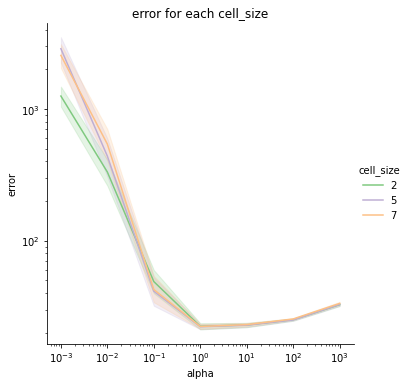

In [65]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line', palette='Accent', hue = 'cell_size')
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='error for each cell_size')

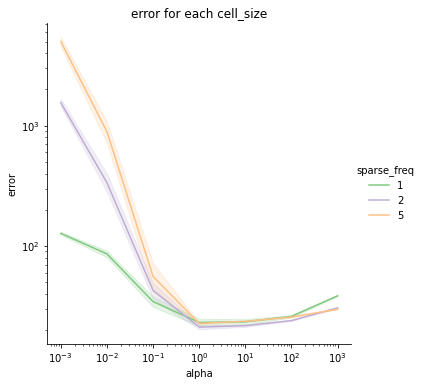

In [67]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line', palette='Accent', hue = 'sparse_freq')
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='error for each cell_size')

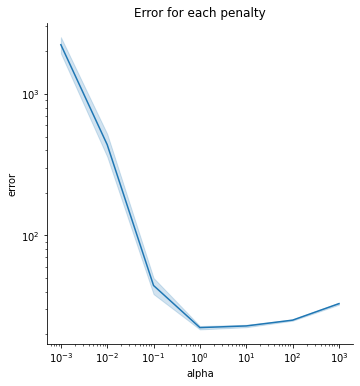

In [59]:
fig = sns.relplot(data = params_df, x = 'alpha', y = 'error', kind='line')
fig.set(yscale='log')
fig.set(xscale='log')
fig.set(title='Error for each penalty')

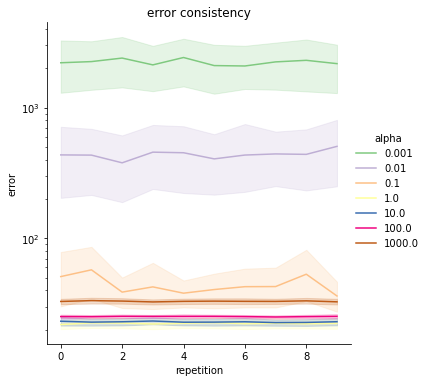

In [63]:
# To show how consistent randomly generated V1 weight would be for each rep. it should be about same for each repetition


fig = sns.relplot(data = params_df, x = 'repetition', y = 'error', kind='line', palette='Accent', hue = 'alpha')
fig.set(title='error consistency')
fig.set(yscale='log')

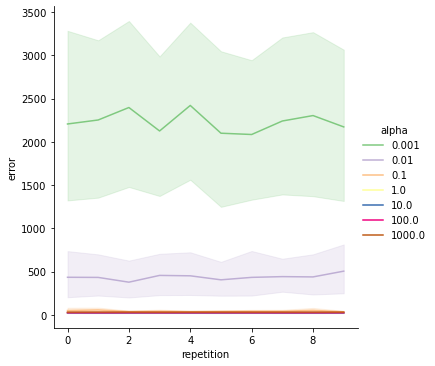

In [60]:
sns.relplot(data = params_df, x = 'repetition', y = 'error', kind='line', palette='Accent', hue = 'alpha')

In [ ]:
plt.figure(figsize=(3, 3))
fig = sns.relplot()

In [19]:
params = []
# result = []
alpha = np.logspace(-3, 3, 7)
rep = np.arange(10)
num_cell = [100, 200, 500]
cell_sz = [2, 5, 7]
sparse_freq = [1, 2, 5]

# Load Image
image_nm = 'image/tree_part1.jpg'
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)

dim = img_arr.shape
n, m = dim

# Load V1 weight
# search_list = {'repetition': rep,
#                'alpha': alpha,
#                'num_cell': ,
#                'cell_sz': [2, 5, 7],
#                'sparse_freq': [1, 2, 5]
#               }


search_list = [rep, alpha, num_cell, cell_sz, sparse_freq]
search = list(itertools.product(*search_list))             
search_df = pd.DataFrame(search, columns= [ 'rep', 'alp', 'num_cell', 'cell_sz', 'sparse_freq'])


result = pd.DataFrame(columns=['s', 'theta', 'reform', 'error'])
# use itertool to reduce amount of for loops
# for row in itertools.product(*search_list.values()):
print("start for loop")
for rep, alp, num, sz, freq in list(search_df.values):
    print(rep, alp, num, sz, freq, dim[0], dim[1])
    W = V1_weights(num, dim, sz, freq) 
    y = generate_Y(W, img_arr)
    W_model = W.reshape(num, n, m)

    theta, reform, s = compress(W_model, y, alp)
    error = np.linalg.norm(img - reform, 'fro') / np.sqrt(m*n)
    
#     params.append({'repetition' : rep,
#                    'num_cell' : num,
#                    'cell_size' : sz,
#                    'sparse_freq' : freq,
#                    'alpha': alp,
#                    'error' : error
#                   })
# opt_param = opt_hyperparams(params)

start for loop
0.0 0.001 100.0 2.0 1.0 30 30


IndexError: invalid index to scalar variable.

In [ ]:
V1_reform = opt_param['reform'].to_numpy()[0]
plt.figure(figsize= (3,3))
plt.axis('off')
plt.imshow(V1_reform)
# use format string to name it with params
plt.savefig("tree_reconstruction.png", dpi = 200)

# Try grayscale color map

# Store original image of gray scale

In [ ]:
params

In [ ]:
alpha = np.arange(1, 401, 5)
search_list = {'alpha': alpha,
          'cell_sz': [2, 5, 7],
          'num_cell': [100, 200, 500],
          'sparse_freq': [1, 2, 5]}
search_list

for row in itertools.product(*search_list.values()):
    product = dict(zip(search_list.keys(), row))
#     print(dict(product))
#     print(dict(product).values()[0])

In [ ]:
#Compress Sensing on function

In [8]:
## Check if this function is applicable to regular compress sensing
compress_img = Image.open("image/tree_part1.jpg")
compress_img = ImageOps.grayscale(compress_img)
compress_arr = np.asarray(compress_img)
cn, cm = compress_arr.shape
print(cn, cm)
compress_samp = 500 #np.floor (cn * cm * 0.20).astype(int)

30 30


In [ ]:
# loop for 10 times 

# Generate random indexes and find corresponding y value for each index
rand_index = np.random.randint(0, cn * cm, compress_samp)
compress_Y = compress_arr.flatten()[rand_index]
compress_Y = compress_Y.reshape(compress_samp, 1)

# Generate C matrix
C = np.eye(cn * cm)[rand_index, :]
C3D = C.reshape(compress_samp, cn, cm)
theta, compress_reform, s = compress(C3D, compress_Y, .0003)

plt.imshow(reform)

In [2]:
img_list = ["image/city_part2.png", "image/city_part3.png"]

for im in img_list:
    img = Image.open(im)
    img = ImageOps.grayscale(img)
    img_arr = np.asarray(img)

    # V1 Variables
    num_cell = 500
    cell_size = 5
    sparse_freq = 1
    dim = img_arr.shape
    n,m = dim

    W = V1_weights(num_cell, dim, cell_size, sparse_freq) 
    y = generate_Y(W, img_arr)
    W_rev = W.reshape(num_cell, n, m)
    theta, reform, s = compress(W_rev, y, 1)
    plt.imshow(reform)
    plt.show()

NameError: name 'img_list' is not defined

In [36]:
type(img_arr)

numpy.ndarray

(30, 30)

1. Save all the images for hyperparams, and hyperparams as well, save original image along with it
2. Try same with compress sensing
